In [2]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib.image import imread
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import os
import pandas as pd

In [85]:
# Create the path for saving all the figures
if os.name != 'posix':
    BASE_PATH = "\\\\?\\" + os.getcwd()
    prefix = '\\'

else:
    BASE_PATH = os.getcwd()
    prefix = '/'

FIG_PATH =  BASE_PATH + prefix + 'figuresPlot'

if not os.path.exists(FIG_PATH):
    os.makedirs(FIG_PATH)

# Set the figure height and width
height = 8
width = 23

# Custom formatting function
def custom_formatter(x, pos):
    if x.is_integer(): 
        return f'{int(x)}'
    else:
        return f'{x}'

In [68]:
# get the unsupervised data
simu_path = prefix + 'simuResults'

model_name = ['unsupervised_bp_1layer', 'unsupervised_bp_2layer', 'unsupervised_ep_1layer', 'unsupervised_ep_2layer', 'untrain_1layer', 'untrain_2layer'] 
serie_name = ['1percent', '5percent', '50percent', 'full_labels']

LC_average, LC_err, DA_average, DA_err = ([[] for _ in range(6)] for _ in range(4))


# read the files in each sub-folder
for md in range(len(model_name)):
    model_path = "\\\\?\\" + os.getcwd() + simu_path + prefix + model_name[md] 
    for k in range(len(serie_name)):
        path = model_path + prefix + serie_name[k]

        files = os.listdir(path)
        store_one2one_av_error = []
        store_classifier_error = []
        for idx, simu in enumerate(files):
            name, extension = os.path.splitext(simu)
            if not extension == '.py' :
                DATAFRAME = pd.read_csv(path + '\\' + simu + '\\results.csv', sep = ',', index_col = 0)
                column_name = DATAFRAME.columns
                if column_name[0] == 'One2one_av_Error':
                    one2one_av_tab =  DATAFRAME['One2one_av_Error'].to_numpy()
                    one2one_av_tab =  one2one_av_tab*100
                    store_one2one_av_error.append(one2one_av_tab)

                FULL = pd.read_csv(path + '\\' + simu + '\\classification_layer.csv', sep = ',', index_col = 0)
                column_name = FULL.columns
                if column_name[2] == 'Final_Test_Error':
                    classifier_tab =  FULL['Final_Test_Error'].to_numpy()
                    classifier_tab = classifier_tab*100
                    store_classifier_error.append(classifier_tab)
            else:
                pass
        LC_average[md].append(np.mean(store_classifier_error, axis = 0)[-1])
        LC_err[md].append(np.std(store_classifier_error, axis = 0)[-1])
        DA_average[md].append(np.mean(store_one2one_av_error, axis = 0)[-1])
        DA_err[md].append(np.std(store_one2one_av_error, axis = 0)[-1])

def convert_to_numpy_inplace(list_of_lists):
    for i in range(len(list_of_lists)):
        list_of_lists[i] = np.array(list_of_lists[i])
for list in [LC_average, LC_err, DA_average, DA_err]:
    convert_to_numpy_inplace(list)

BP_1layer_LC, BP_2layer_LC, EP_1layer_LC, EP_2layer_LC, Untrain_1layer_LC, Untrain_2layer_LC = LC_average
BP_1layer_LC_err, BP_2layer_LC_err, EP_1layer_LC_err, EP_2layer_LC_err, Untrain_1layer_LC_err, Untrain_2layer_LC_err = LC_err

BP_1layer_DA, BP_2layer_DA, EP_1layer_DA, EP_2layer_DA, Untrain_1layer_DA, Untrain_2layer_DA = DA_average
BP_1layer_DA_err, BP_2layer_DA_err, EP_1layer_DA_err, EP_2layer_DA_err, Untrain_1layer_DA_err, Untrain_2layer_DA_err = DA_err
    

## Figure 3. One layer unsupervised results compares with untrained network results

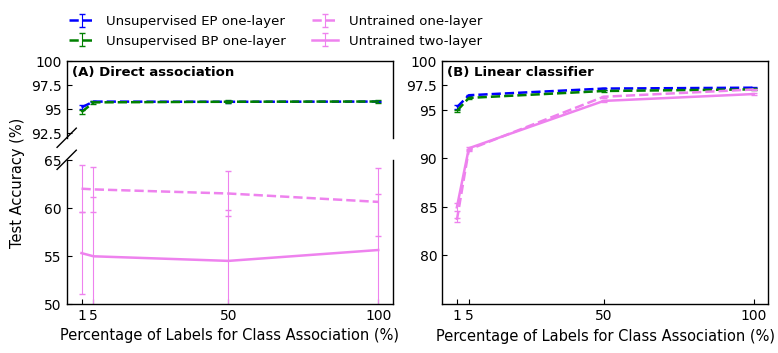

In [207]:
from brokenaxes import brokenaxes
from matplotlib.gridspec import GridSpec

# DATA
DA_serie = [100-EP_1layer_DA, 100-BP_1layer_DA, 100-Untrain_1layer_DA]
DA_error_serie = [EP_1layer_DA_err, BP_1layer_DA_err, Untrain_1layer_DA_err]
DA_2layer_serie = [100-Untrain_2layer_DA]
DA_2layer_error_serie = [Untrain_2layer_DA_err]

LC_serie = [100-EP_1layer_LC, 100-BP_1layer_LC, 100-Untrain_1layer_LC]
LC_error_serie = [EP_1layer_LC_err, BP_1layer_LC_err, Untrain_1layer_LC_err]
LC_2layer_serie = [100-Untrain_2layer_LC]
LC_2layer_error_serie = [Untrain_2layer_LC_err]

color_serie = ['blue', 'green', 'violet']
label_serie = ['Unsupervised EP one-layer', 'Unsupervised BP one-layer', 'Untrained one-layer']
label_2layer_serie = ['Untrained two-layer']

label_percent = np.array([1, 5, 50, 100])

# Plot figures
sns.set_style("white")
plt.style.use('default')
plt.style.use('figuresPlot/custom.mplstyle')

fig = plt.figure()
# Create a GridSpec with 1 row and 2 columns
sps1, sps2 = GridSpec(1, 2, figure=fig, width_ratios=[1, 1])
# Create the break axe plot
bax = brokenaxes(ylims=((50, 65), (92, 100)), subplot_spec=sps1)
for k in range(len(DA_serie)):
    bax.errorbar(label_percent, DA_serie[k], yerr=DA_error_serie[k], label=label_serie[k], color=color_serie[k], linestyle='dashed', capsize=2, elinewidth=0.8)
bax.errorbar(label_percent, DA_2layer_serie[0], yerr=DA_2layer_error_serie[0], label=label_2layer_serie[0], color='violet', capsize=2, elinewidth=0.8)
bax.axs[0].set_yticks([92.5, 95, 97.5, 100])
bax.axs[0].yaxis.set_major_formatter(FuncFormatter(custom_formatter))

count = 0
for sub_ax in bax.axs:
    sub_ax.tick_params(axis='both', which='major', direction='in', labelsize=10)
    sub_ax.tick_params(axis='both', which='minor', length=0)
    sub_ax.set_xticks(label_percent)
    for spine in sub_ax.spines.values():
        spine.set_visible(True)
        if count!=2 and count!=7:
            spine.set_linewidth(1)
        else:
            spine.set_visible(False)
        count+=1

# Add a regular subplot on the RIGHT using the GridSpec
ax = fig.add_subplot(sps2)
for k in range(len(LC_serie)):
    ax.errorbar(label_percent, LC_serie[k], yerr=LC_error_serie[k], label=label_serie[k], color=color_serie[k], linestyle='dashed', capsize=2, elinewidth=0.8)
ax.errorbar(label_percent, LC_2layer_serie[0], yerr=LC_2layer_error_serie[0], label=label_2layer_serie[0], color='violet', capsize=2, elinewidth=0.8)
ax.tick_params(axis='both', which='major')
ax.set_ylim([75, 100])
ax.set_yticks([80, 85, 90, 95, 97.5, 100])
ax.yaxis.set_major_formatter(FuncFormatter(custom_formatter))
ax.set_xticks(label_percent)

# Set labels for subplots
ax.set_xlabel("Percentage of Labels for Class Association (%)")
bax.set_xlabel("Percentage of Labels for Class Association (%)", labelpad=17)
bax.set_ylabel("Test Accuracy (%)", labelpad=30)

# Set text
bax.axs[0].text(0.015, 0.81, '(A) Direct association', transform=bax.axs[0].transAxes, fontsize=9.5, fontweight='bold')
ax.text(0.015, 0.94, '(B) Linear classifier', transform=ax.transAxes, fontsize=9.5, fontweight='bold')

legend = ax.legend(loc='upper center', bbox_to_anchor=(-0.51, 1.24), ncol=2)
frame = legend.get_frame()
for legend_handle in legend.legend_handles:
    legend_handle._sizes = [100]
    
fig.subplots_adjust(wspace=0.15)
plt.savefig(FIG_PATH+prefix+'OneLayer_compare_untrained.pdf')

## Figure 4. Two layer unsupervised results compare with one-layer 

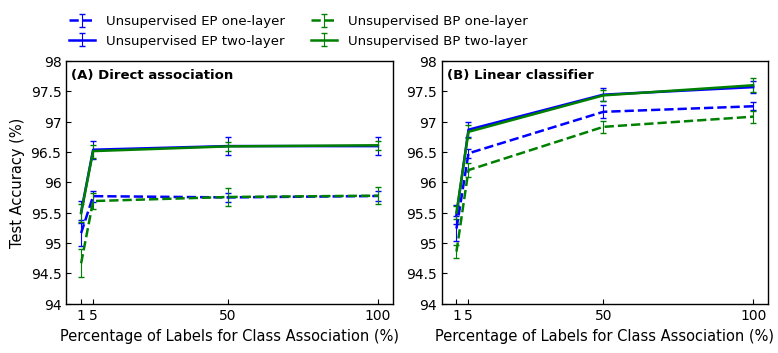

In [206]:
# xaxis : test accuracy on MNIST; yaxis: percentage of labels used in two different class association methods
# network has always 2,000 output neurons and 2,000 hidden neurons if a hidden unsupervised layer is included

# DATA
DA_serie = [100-EP_1layer_DA, 100-BP_1layer_DA]
DA_error_serie = [EP_1layer_DA_err, BP_1layer_DA_err]
DA_2layer_serie = [100-EP_2layer_DA, 100-BP_2layer_DA]
DA_2layer_error_serie = [EP_2layer_DA_err, BP_2layer_DA_err]

LC_serie = [100-EP_1layer_LC, 100-BP_1layer_LC]
LC_error_serie = [EP_1layer_LC_err, BP_1layer_LC_err]
LC_2layer_serie = [100-EP_2layer_LC, 100-BP_2layer_LC]
LC_2layer_error_serie = [EP_2layer_LC_err, BP_2layer_LC_err]

color_serie = ['blue', 'green']
label_serie = ['Unsupervised EP one-layer', 'Unsupervised BP one-layer']
label_2layer_serie = ['Unsupervised EP two-layer', 'Unsupervised BP two-layer']

label_percent = np.array([1, 5, 50, 100])
ylim = [94, 98]

# Plot figures

sns.set_style("white")
plt.style.use('default')
plt.style.use('figuresPlot/custom.mplstyle')

fig, ax = plt.subplots(1, 2)
for axis in (ax[0], ax[1]):
    axis.set_xlabel("Percentage of Labels for Class Association (%)")
    axis.tick_params(axis='both', which='major', labelsize=10)
    axis.yaxis.set_major_formatter(FuncFormatter(custom_formatter))
    axis.set_xticks(label_percent)
    axis.set_ylim(ylim)
    
ax[0].set_ylabel('Test Accuracy (%)')
 
for k in range(len(DA_serie)):
    ax[0].errorbar(label_percent, DA_serie[k], yerr=DA_error_serie[k], label=label_serie[k], color=color_serie[k], linestyle='dashed', capsize=2, elinewidth=0.8)
    ax[0].errorbar(label_percent, DA_2layer_serie[k], yerr=DA_2layer_error_serie[k], label=label_2layer_serie[k], color=color_serie[k], capsize=2, elinewidth=0.8)

for k in range(len(LC_serie)):
    ax[1].errorbar(label_percent, LC_serie[k], yerr=LC_error_serie[k], label=label_serie[k], color=color_serie[k], linestyle='dashed',  capsize=2, elinewidth=0.8)
    ax[1].errorbar(label_percent, LC_2layer_serie[k], yerr=LC_2layer_error_serie[k], label=label_2layer_serie[k], color=color_serie[k], capsize=2, elinewidth=0.8)

ax[0].text(0.015, 0.93, '(A) Direct association', transform=ax[0].transAxes, fontsize=9.5, fontweight='bold')
ax[1].text(0.015, 0.93, '(B) Linear classifier', transform=ax[1].transAxes, fontsize=9.5, fontweight='bold')

legend = ax[1].legend(loc='upper center', bbox_to_anchor=(-0.44, 1.24), ncol=2)
frame = legend.get_frame()
for legend_handle in legend.legend_handles:
    legend_handle._sizes = [100]

fig.subplots_adjust(wspace=0.15)
plt.savefig(FIG_PATH+prefix+'TwoLayer_improvement.pdf', format='pdf', dpi=500, bbox_inches='tight')

## Figure 5. Maximum activation images for one-layer and two-layer unsupervised network

In [111]:
import json
import torch
import torchvision
from bp.network import MLP
from bp.train_test import classify
from funcs.data import ReshapeTransform, SplitClass
from funcs.visu import *

In [112]:
# load the mnist dataset
transforms = [torchvision.transforms.ToTensor(), ReshapeTransform((-1,))]
train_set = torchvision.datasets.MNIST(root='./data', train=True, download=True,
                                           transform=torchvision.transforms.Compose(transforms))
test_set = torchvision.datasets.MNIST(root='./data', train=False, download=True,
                                          transform=torchvision.transforms.Compose(transforms))
test_loader = torch.utils.data.DataLoader(test_set, batch_size=512, shuffle=True)

classLabel_percentage = 0.05
class_set = SplitClass(train_set.data, train_set.targets, classLabel_percentage, seed=34, transform=torchvision.transforms.Compose(transforms))
class_loader = torch.utils.data.DataLoader(class_set, batch_size=512, shuffle=False)

In [113]:
def maximum_activation_images(net, jparams, class_loader, k_select_neurons):
    responses, kmax_response_neuron = classify(net, jparams, class_loader,  k_select_neurons)
    if jparams['dataset'] == 'mnist':
        data_average = 33.2
        lr = 10
        nb_epoch = 500
    elif jparams['dataset'] == 'fashionMnist':
        data_average = 72.9
        lr = 10
        nb_epoch = 500
    else: 
        raise ValueError("The average value of given dataset is not calculated")
    
    # maximum activation function for the output layer
    if jparams['dataset'] == 'mnist' or jparams['dataset'] =='fashionMnist':
        neurons_range = kmax_response_neuron.cpu().tolist()
        image_max = torch.zeros(len(neurons_range), 28 * 28)
        optimized_num = 0
        for neu in neurons_range:
            image = torch.rand(1, 28 * 28, requires_grad=True, device=net.device)
            optimizer = torch.optim.SGD([image], lr=lr)
            for epoch in range(nb_epoch):
                optimizer.zero_grad()
                net.eval()
                output = image # not apply the output activation func
                for i in range(len(net.fcnet)-1):
                    output = net.fcnet[i](output)
                loss = - output[0, neu]
                loss.backward()
                optimizer.step()
                image = (data_average * (image.data / torch.norm(image.data).item())).requires_grad_(True)

            image_max[optimized_num, :] = image.detach().cpu().clone()
            optimized_num += 1

        return image_max

In [114]:
# Engister the path of unsupervisedly trained network
P_unsupervised_json_path = './configFile/unsupervised_bp/1layer'
P_unsupervised_trained_path = './simuResults/unsupervised_bp_1layer/model'
MLP_unsupervised_json_path = './configFile/unsupervised_bp/2layer'
MLP_unsupervised_trained_path = './simuResults/unsupervised_bp_2layer/model'


# load the trained unsupervised network
with open(P_unsupervised_json_path + prefix + 'config.json') as f:
  P_unsupervised_jparams = json.load(f)
with open(MLP_unsupervised_json_path + prefix + 'config.json') as f:
  MLP_unsupervised_jparams = json.load(f)

# define the device to loade
load_device = torch.device("cuda:" + str(0))

# define the devices
P_unsupervised_net = MLP(P_unsupervised_jparams)
P_unsupervised_net.load_state_dict(torch.load(P_unsupervised_trained_path +'/model_state_dict.pt', map_location=load_device))
P_unsupervised_net.eval()

MLP_unsupervised_net = MLP(MLP_unsupervised_jparams)
MLP_unsupervised_net.load_state_dict(torch.load(MLP_unsupervised_trained_path  +'/model_state_dict.pt', map_location=load_device))
MLP_unsupervised_net.eval()

# Do the image maximum visualization
k_select_neurons = 2
imShape = [28, 28]
display = [4, 5]

image_max_layers_perceptron = maximum_activation_images(P_unsupervised_net, P_unsupervised_jparams, class_loader, k_select_neurons)
image_max_layers_hidden = maximum_activation_images(MLP_unsupervised_net, MLP_unsupervised_jparams, class_loader, k_select_neurons)

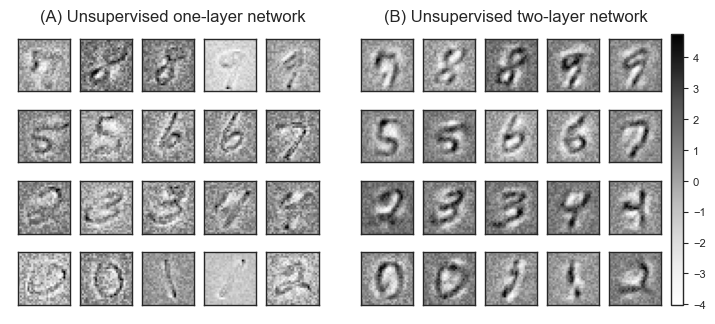

In [193]:
# plot the subplots of visualization 
height_cm = 8
width_cm = 20

sns.set_style("white")
fig, (ax1, ax2) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [1, 1]},sharey=False, 
                               figsize=(width_cm * 0.3937, height_cm * 0.3937))

# Create subplots within the main subplot
for i in range(display[0]*display[1]):
    subax = ax1.inset_axes([0.025 + (i % 5) * 0.19, 0.01 + (i // 5) * 0.24, 0.16, 0.22])
    plot= subax.imshow(image_max_layers_perceptron[i,:].reshape(imShape[0], imShape[1]), cmap=cm.Greys)
    subax.get_xaxis().set_visible(False)
    subax.get_yaxis().set_visible(False)
# Set common labels and title for each main subplot
ax1.set_title('(A) Unsupervised one-layer network',fontsize=12, y=0.96)

for i in range(display[0]*display[1]):
    subax = ax2.inset_axes([0.025 + (i % 5) * 0.19, 0.01 + (i // 5) * 0.24, 0.16, 0.22])
    plot= subax.imshow(image_max_layers_hidden[i,:].reshape(imShape[0], imShape[1]), cmap=cm.Greys)
    subax.get_xaxis().set_visible(False)
    subax.get_yaxis().set_visible(False)
    
# Set common labels and title for each main subplot
ax2.set_title('(B) Unsupervised two-layer network',fontsize=12, y=0.96)


cax = plt.axes([0.89, 0.04, 0.015, 0.86])
cb = fig.colorbar(plot, cax=cax)
cb.ax.tick_params(labelsize=8)

for ax in (ax1, ax2):
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
fig.subplots_adjust(wspace=0.05, hspace=0.25, left=0.05, right=0.9, top=0.95, bottom=0.01)
plt.savefig(FIG_PATH+prefix+'visualization_compare_BP.pdf', format='pdf', dpi=500, bbox_inches='tight')

## Figure 7. Semi-supervised results with different number of labels

In [117]:
# read the files
supervised_av = [[],[]]
supervised_std = [[],[]]
semi_av = [[],[]]
semi_std = [[],[]]
wta_av = [[],[]]
wta_std = [[],[]]

serie_name = ['100labels', '300labels', '600labels', '1000labels', '3000labels']
sub_path = ['semi_bp', 'semi_ep']

for n_id in range(2):
    # get the supervised + semi results
    path = BASE_PATH + prefix + 'simuResults' 
    path += prefix + sub_path[n_id]
    for k in range(len(serie_name)):
        folder_path = path + prefix + serie_name[k]
        files = os.listdir(folder_path)
        store_supervised_error = []
        store_semi_error = []
        for idx, simu in enumerate(files):
            name, extension = os.path.splitext(simu)
            if not extension == '.py':
                DATAFRAME = pd.read_csv(folder_path + prefix + simu + prefix + 'pre_supervised.csv', sep = ',', index_col = 0)
                column_name = DATAFRAME.columns
                if column_name[2] == 'Test_Error':
                    supervised_error_tab =  DATAFRAME['Test_Error'].to_numpy()
                    supervised_error_tab = supervised_error_tab*100
                    store_supervised_error.append(supervised_error_tab)

                FULL = pd.read_csv(folder_path + prefix + simu + prefix + 'semi_supervised.csv', sep = ',', index_col = 0)
                column_name = FULL.columns
                if column_name[2] == 'Supervised_Test_Error':
                    semi_error_tab =  FULL['Supervised_Test_Error'].to_numpy()
                    semi_error_tab = semi_error_tab*100
                    store_semi_error.append(semi_error_tab)
            else:
                pass
        supervised_av[n_id].append(np.mean(store_supervised_error, axis=0)[-1])
        supervised_std[n_id].append(np.std(store_supervised_error, axis=0)[-1])
        semi_av[n_id].append(np.mean(store_semi_error, axis=0)[-1])
        semi_std[n_id].append(np.std(store_semi_error, axis=0)[-1])
        
    # get the WTA results
    for k in range(len(serie_name)):
        folder_path = path + prefix+ 'without_homeo' +prefix +  serie_name[k]
        files = os.listdir(folder_path)
        store_semi_error = []
        for idx, simu in enumerate(files):
            name, extension = os.path.splitext(simu)
            if not extension == '.py':
                FULL = pd.read_csv(folder_path + prefix + simu + prefix +'semi_supervised.csv', sep = ',', index_col = 0)
                column_name = FULL.columns
                if column_name[2] == 'Supervised_Test_Error':
                    semi_error_tab =  FULL['Supervised_Test_Error'].to_numpy()
                    semi_error_tab = semi_error_tab*100
                    store_semi_error.append(semi_error_tab)
            else:
                pass
        wta_av[n_id].append(np.mean(store_semi_error, axis=0)[-1])
        wta_std[n_id].append(np.std(store_semi_error, axis=0)[-1])

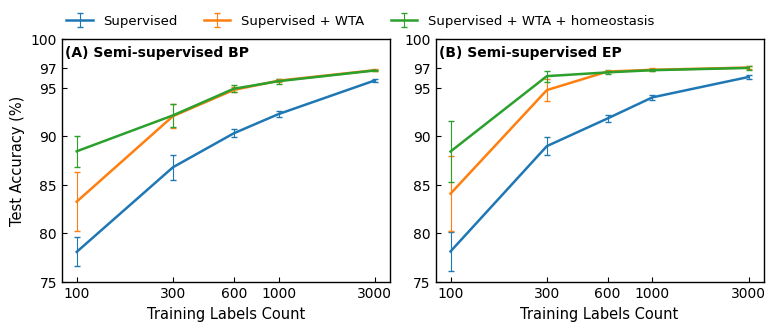

In [211]:
# plot the semi-supervised learning results

sns.set_style("white")
plt.style.use('default')
plt.style.use('figuresPlot/custom.mplstyle')

fig, ax =  plt.subplots(1, 2)

labels_num = np.array([100, 300, 600, 1000, 3000])
legend_name = ['Supervised', 'Supervised + WTA', 'Supervised + WTA + homeostasis']

for list in [supervised_av, wta_av, semi_av]:
    convert_to_numpy_inplace(list)

ylim = [75, 100]
y_values = [75, 80, 85, 90, 95, 97, 100]
label_title = ['(A) Semi-supervised BP', '(B) Semi-supervised EP']            
for i in range(len(ax)):
    ax[i].text(0.01, 0.93, label_title[i], transform=ax[i].transAxes, fontsize=10, fontweight='bold')
    ax[i].errorbar(labels_num, 100-supervised_av[i], yerr=supervised_std[i], label=legend_name[0], capsize=2, elinewidth=0.8)
    ax[i].errorbar(labels_num, 100-wta_av[i], yerr=wta_std[i], label=legend_name[1], capsize=2, elinewidth=0.8)
    ax[i].errorbar(labels_num, 100-semi_av[i], yerr=semi_std[i], label=legend_name[2], capsize=2, elinewidth=0.8)
    
    ax[i].set_xscale('log')
    ax[i].set_xticks(labels_num)
    ax[i].set_xticklabels(labels_num)
    ax[i].set_ylim(ylim)
    ax[i].set_yticks(y_values)
    ax[i].yaxis.set_major_formatter(FuncFormatter(custom_formatter))
    ax[i].tick_params(axis='both', which='minor', length=0)
    ax[i].tick_params(axis='both', which='major')
    ax[i].set_xlabel('Training Labels Count')
    
ax[0].set_ylabel('Test Accuracy (%)')

legend = ax[1].legend(loc='upper center', bbox_to_anchor=(-0.23, 1.15), ncol=3)
frame = legend.get_frame()
for legend_handle in legend.legend_handles:
    legend_handle._sizes = [100]
    
fig.subplots_adjust(wspace=0.14)

# fig.subplots_adjust(wspace=0.2,left=0.07, right=0.97)     
plt.savefig(FIG_PATH+prefix+'Semi_EPBP.pdf', format='pdf', dpi=500, bbox_inches='tight')


## Figure 8. UMAP embedding of semi-supervised results

In [146]:
import umap.umap_ as umap
# load the data save in .pkl
# supervised pre-training data
df_supervised = pd.read_pickle('./simuResults/umap/supervised/output_records.pkl')
X_supervised = np.array(df_supervised['img'].values.tolist())
target_supervised = np.array(df_supervised['target'].values.tolist())
# WTA training (+WTA)
df_withoutH = pd.read_pickle('./simuResults/umap/wta/output_records.pkl')
X_withoutH = np.array(df_withoutH['img'].values.tolist())
target_withoutH = np.array(df_withoutH['target'].values.tolist())
# semi-supervised training (+WTA+Homeostasis)
df_semi = pd.read_pickle('./simuResults/umap/semi/output_records.pkl')
X_semi = np.array(df_semi['img'].values.tolist())
target_semi = np.array(df_semi['target'].values.tolist())

C:\Users\CNRS-THALES\anaconda3\envs\test_envs\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [147]:
# define the UMAP reducer
reducer = umap.UMAP(n_neighbors=20,
        min_dist=0.12,
        n_components=2)
# embedde output results to 2D
embedding_supervised = reducer.fit_transform(X_supervised)
embedding_semi = reducer.fit_transform(X_semi)
embedding_withoutH = reducer.fit_transform(X_withoutH)

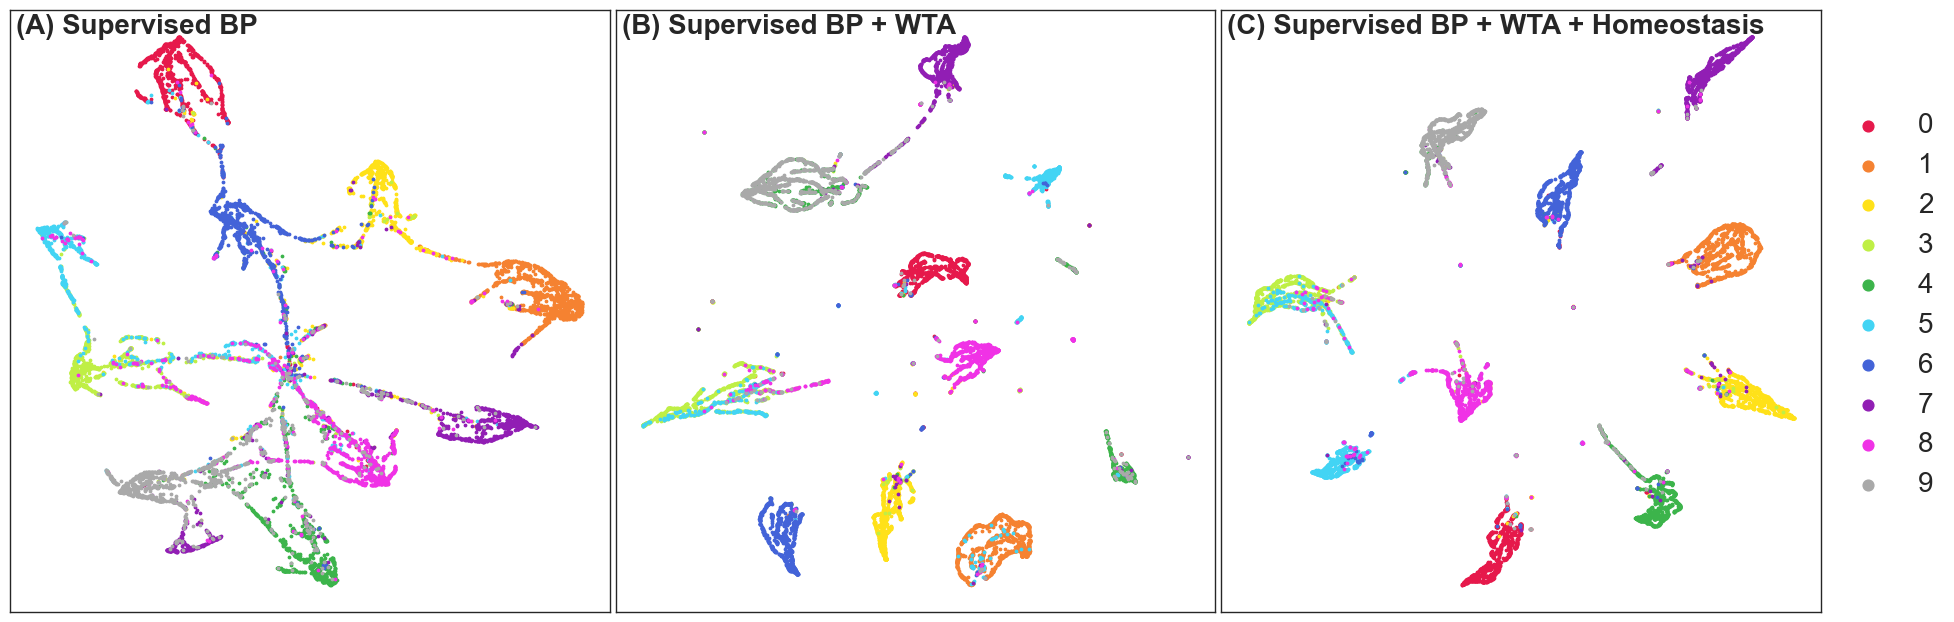

In [148]:
# plot the UMAP result
height_cm = 18
width_cm = 50
sns.set_style("white")
fig, (ax1,ax2,ax3)  = plt.subplots(1, 3, gridspec_kw={'width_ratios': [0.8, 0.8, 0.8]},sharey=False, 
                               figsize=(width_cm * 0.3937, height_cm * 0.3937))

colorList = ['#e6194B', '#f58231', '#ffe119', '#bfef45', '#3cb44b', '#42d4f4', '#4363d8', '#911eb4', '#f032e6', '#a9a9a9']
for i in range(10):
    ax1.scatter(embedding_supervised[target_supervised==i, 0], embedding_supervised[target_supervised==i, 1], c=colorList[i], s=3, label=i)
    ax2.scatter(embedding_withoutH[target_withoutH==i, 0], embedding_withoutH[target_withoutH==i, 1], c=colorList[i], s=3, label=i)
    ax3.scatter(embedding_semi[target_semi==i, 0], embedding_semi[target_semi==i, 1], c=colorList[i], s=3, label=i)

ax1.text(0.01, 0.96, '(A) Supervised BP ', transform=ax1.transAxes, fontsize=20, fontweight='bold')
ax2.text(0.01, 0.96, '(B) Supervised BP + WTA', transform=ax2.transAxes, fontsize=20,fontweight='bold')
ax3.text(0.01, 0.96, '(C) Supervised BP + WTA + Homeostasis', transform=ax3.transAxes, fontsize=20,fontweight='bold')
# fig.suptitle('UMAP 2D embedding of the network output for MNIST test data', fontsize=26, fontweight='bold', y=0.06,x=0.5)
fig.subplots_adjust(wspace=0.01, hspace=0.3, left=0.01, right=0.93, top=0.95, bottom=0.1)
for axis in (ax1,ax2,ax3):
    axis.get_xaxis().set_visible(False)
    axis.get_yaxis().set_visible(False)
    
legend = ax3.legend(loc='upper left', bbox_to_anchor=(0.99, 0.87), fontsize=20)
for legend_handle in legend.legend_handles:
    legend_handle._sizes = [60]
plt.savefig(FIG_PATH+prefix+'UMAP_semi_bp.pdf', format='pdf', dpi=500)

## Figure 9. Learned weight comparison between supervised and unsupervised end-to-end learning

In [149]:
# load the supervisedly trained model
P_supervised_json_path = './configFile/supervised_bp/1layer'
P_supervised_trained_path = './simuResults/supervised_bp/1layer'
MLP_supervised_json_path = './configFile/supervised_bp/2layer'
MLP_supervised_trained_path = './simuResults/supervised_bp/2layer'
with open(P_supervised_json_path + prefix + 'config.json') as f:
  P_supervised_jparams = json.load(f)
with open(MLP_supervised_json_path + prefix + 'config.json') as f:
  MLP_supervised_jparams = json.load(f)
# map the learned model to the device
P_supervised_net = MLP(P_supervised_jparams)
P_supervised_net.load_state_dict(torch.load(P_supervised_trained_path +'/model_state_dict.pt', map_location=load_device))
P_supervised_net.eval()

MLP_supervised_net = MLP(MLP_supervised_jparams)
MLP_supervised_net.load_state_dict(torch.load(MLP_supervised_trained_path  +'/model_state_dict.pt', map_location=load_device))
MLP_supervised_net.eval()
# function to get the weights
def get_MLP_weights_index(net, jparams, display):
    for name, layer in net.fcnet.named_children():
        if name == 'fc_0':
            weights = layer.weight.data
    if jparams['device'] >= 0:
        weights = weights.cpu()
        
    torch.manual_seed(42)
    perm = torch.randperm(jparams['fcLayers'][-1])
    index = perm[:20]
    return weights, index

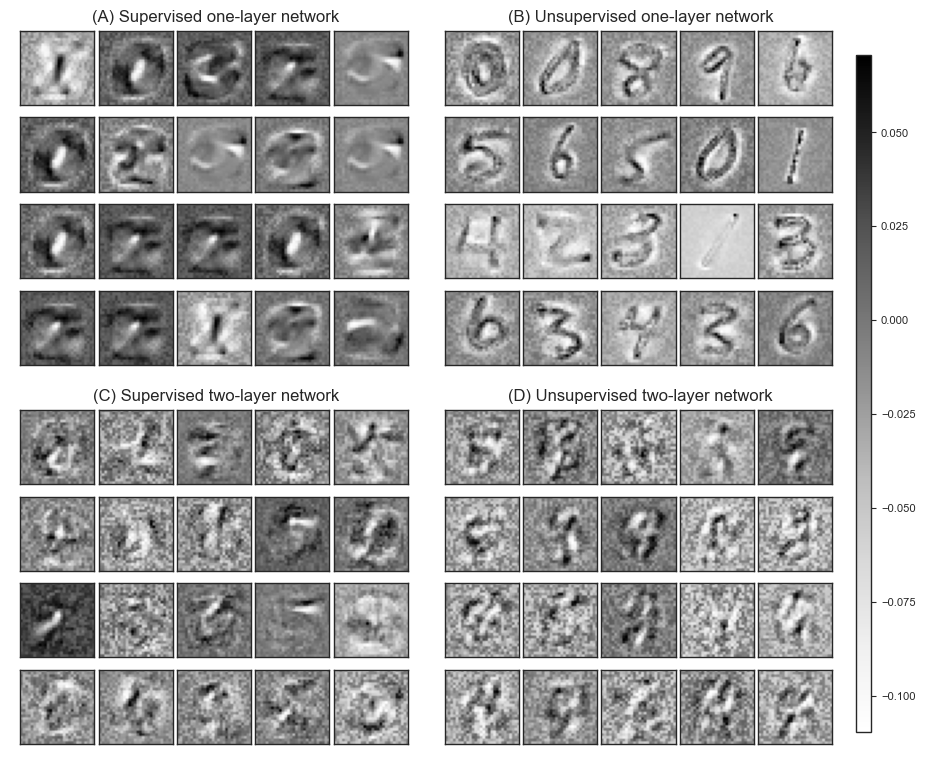

In [150]:
# plot the subplots of weights
height_cm = 20
width_cm = 25
sns.set_style("white")
fig, axes = plt.subplots(2, 2, gridspec_kw={'height_ratios': [1, 1]}, sharex=True, figsize=(width_cm * 0.3937, height_cm * 0.3937))
display = [4,5]
imShape = [28, 28]
# get all the weights
P_supervised_W, P_supervised_index  = get_MLP_weights_index(P_supervised_net, P_supervised_jparams, display)
P_unsupervised_W, P_unsupervised_index  = get_MLP_weights_index(P_unsupervised_net, P_unsupervised_jparams, display)
MLP_supervised_W, MLP_supervised_index  = get_MLP_weights_index(MLP_supervised_net, MLP_supervised_jparams, display)
MLP_unsupervised_W, MLP_unsupervised_index  = get_MLP_weights_index(MLP_unsupervised_net, MLP_unsupervised_jparams, display)
store_W = [P_supervised_W, P_unsupervised_W, MLP_supervised_W, MLP_unsupervised_W]
store_index = [P_supervised_index, P_unsupervised_index, MLP_supervised_index, MLP_unsupervised_index]
store_Title = ['(A) Supervised one-layer network', '(B) Unsupervised one-layer network', '(C) Supervised two-layer network', '(D) Unsupervised two-layer network']
flat_axes = axes.flatten()

# Loop over each subplot axis
for k, ax in enumerate(flat_axes):
    for i in range(display[0] * display[1]):
        subax = ax.inset_axes([0.025 + (i % 5) * 0.19, 0.026 + (i // 5) * 0.24, 0.18, 0.22])
        plot = subax.imshow(store_W[k][store_index[k][i], :].reshape(imShape[0], imShape[1]), cmap=cm.Greys)
        subax.get_xaxis().set_visible(False)
        subax.get_yaxis().set_visible(False)
        
    # turn off axis
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title(store_Title[k],fontsize=12, y=0.96)
    
    # Hide all spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    

cax = plt.axes([0.91, 0.04, 0.015, 0.86])
cb = fig.colorbar(plot, cax=cax)
cb.ax.tick_params(labelsize=8)
# fig.suptitle('Maximum activation images of output neurons', fontsize=12, fontweight='bold'
plt.subplots_adjust(wspace=0.03, hspace=0.05, left=0.05, right=0.9, top=0.95, bottom=0.01)
plt.savefig(FIG_PATH + prefix + 'visualization_compare_supervised.pdf', format='pdf', dpi=500, bbox_inches='tight')

## Figure 10. Accuracy comparison between batch and sequential mode

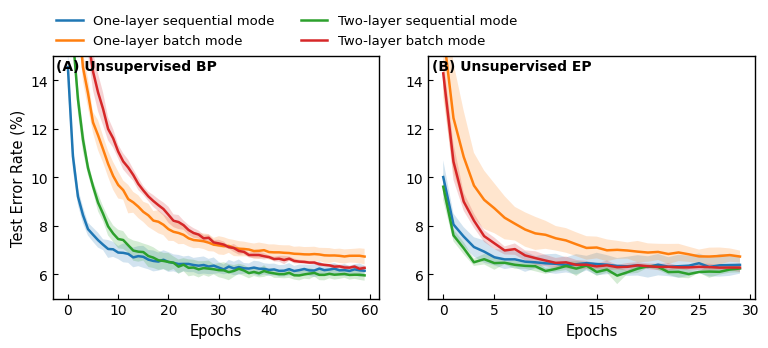

In [210]:
# read the files in each sub-folder
serie_result = []
serie_name = ['BP_1layer_sequential', 'BP_1layer_batch','BP_2layers_sequential','BP_2layers_batch', 
              'EP_1layer_sequential', 'EP_1layer_batch','EP_2layers_sequential','EP_2layers_batch']
legend_name = ['One-layer sequential mode', 'One-layer batch mode', 'Two-layer sequential mode', 'Two-layer batch mode',
               'One-layer sequential mode', 'One-layer batch mode', 'Two-layer sequential mode', 'Two-layer batch mode']

for k in range(len(serie_name)):
    path = BASE_PATH + prefix + 'simuResults'+prefix + 'mode_compare'
    path += prefix + serie_name[k]

    files = os.listdir(path)
    store_av_error = []

    for idx, simu in enumerate(files):
        name, extension = os.path.splitext(simu)
        if not extension == '.py':
            DATAFRAME = pd.read_csv(path + prefix + simu + prefix +'results.csv', sep = ',', index_col = 0)
            column_name = DATAFRAME.columns
            if column_name[0] == 'One2one_av_Error':
                av_error_tab =  DATAFRAME['One2one_av_Error'].to_numpy()
                av_error_tab = av_error_tab*100
                store_av_error.append(av_error_tab)
            elif column_name[0] == 'Test_Error_av':
                av_error_tab =  DATAFRAME['Test_Error_av'].to_numpy()
                av_error_tab = av_error_tab*100
                store_av_error.append(av_error_tab)
        else:
            pass
    serie_result.append(store_av_error)
    
# plot the result
sns.set_style("white")
plt.style.use('default')
plt.style.use('figuresPlot/custom.mplstyle')
fig, ax = plt.subplots(1, 2)

for i in range(8):
    store_av = np.array(serie_result[i])
    mean_av = np.mean(store_av, axis = 0)
    std_av = np.std(store_av, axis = 0)
    epochs = np.arange(0, len(store_av[0]))
    if i < 4:
        ax[0].plot(epochs, mean_av, label = legend_name[i])
        ax[0].fill_between(epochs, mean_av-std_av, mean_av+std_av, alpha=0.2)
    else:
        ax[1].plot(epochs, mean_av, label = legend_name[i])
        ax[1].fill_between(epochs, mean_av-std_av, mean_av+std_av, alpha=0.2)

ylim = [5, 15]
label_title = ['(A) Unsupervised BP', '(B) Unsupervised EP']
for i in range(2):
    ax[i].tick_params(axis='both', which='major', labelsize=10)
    ax[i].set_xlabel('Epochs')
    ax[i].text(0.01, 0.94, label_title[i], transform=ax[i].transAxes, fontsize=10, fontweight='bold')
    ax[i].set_ylim(ylim)
    
ax[0].set_ylabel('Test Error Rate (%)')
    
# legend
legend = ax[1].legend(loc='upper center', bbox_to_anchor=(-0.434, 1.22), ncol=2)
frame = legend.get_frame()
for legend_handle in legend.legend_handles:
    legend_handle._sizes = [100]
frame.set_linewidth(0) 

fig.subplots_adjust(wspace=0.15)    
plt.savefig(FIG_PATH+prefix+'mode_compare.pdf', format='pdf', dpi=500, bbox_inches='tight')

## Figure 11. Influence of output neurons number on the unsupervised results

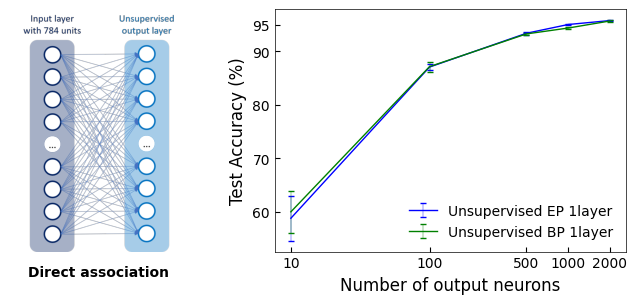

In [192]:
# DATA for different output numbers with Direct Association

x_layers = np.array([10, 100, 500, 1000, 2000])

EP_1layer = np.array([58.74, 87.06, 93.39, 95.03, 95.77])
EP_1layer_err = np.array([4.18, 0.64, 0.26, 0.09, 0.09])
BP_1layer = np.array([59.94, 87.14, 93.27, 94.37, 95.69])
BP_1layer_err = np.array([3.95, 0.95, 0.25, 0.17, 0.13])

# draw the figure for one unsupervised layer
sns.set_style("white")
plt.style.use('default')
plt.style.use('figuresPlot/custom.mplstyle')

fig, ax = plt.subplots(1, 2)

direct_path = './figuresPlot/1layer_direct.png'
direct_schema = imread(direct_path)

ax[0].imshow(direct_schema, aspect='equal')
ax[0].axis('off')
ax[1].set_xlabel("Number of output neurons", fontsize=12)
ax[1].set_ylabel("Test Accuracy (%)", fontsize=12)
for spine in ax[1].spines.values():
    spine.set_linewidth(0.5)

# plot1
ax[1].errorbar(x_layers, EP_1layer, yerr=EP_1layer_err, label='Unsupervised EP 1layer', linestyle='solid', color='blue', lw=1, capsize=2, elinewidth=0.3)
ax[1].errorbar(x_layers, BP_1layer, yerr=BP_1layer_err, label='Unsupervised BP 1layer', linestyle='solid', color='green', lw=1, capsize=2, elinewidth=0.3)

y_values = [60, 70, 80, 90, 95]
ax[1].tick_params(axis='both', which='major', labelsize=10)
ax[1].tick_params(axis='both', which='minor', length=0)
ax[1].legend(loc='lower right', fontsize=10)  
ax[0].text(0.1, -0.1, 'Direct association', transform=ax[0].transAxes, fontsize=10, fontweight='bold')

ax[1].set_xscale('log')
ax[1].set_xticks(x_layers)
ax[1].set_xticklabels(x_layers)
ax[1].set_yticks(y_values)
    
fig.subplots_adjust(wspace=-0, hspace=0.05)
plt.savefig(FIG_PATH+prefix+'output_1layer.pdf', format='pdf', dpi=500, bbox_inches='tight')